In [41]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('../moblie_data/train.csv')
test = pd.read_csv('../moblie_data/test.csv')

/Users/fu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,5,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/fu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pd.options.display.max_columns = 100

## 数据概览

In [4]:
train['current_service'] = train['current_service'].astype(str)

In [5]:
print(train.shape, test.shape)

(612652, 27) (262565, 26)


In [6]:
train.groupby('service_type').current_service.value_counts()

service_type  current_service
1             90063345           201245
              90109916            26685
              90155946            15477
3             99104722            36289
4             89950166            93252
              89950167            51440
              99999828            37146
              89016252            36379
              89950168            23316
              99999827            22753
              99999826            20393
              99999830            14840
              99999825            14323
              89016253            10019
              89016259             9095
Name: current_service, dtype: int64

In [7]:
test.service_type.value_counts()

4    142914
1    103945
3     15706
Name: service_type, dtype: int64

## 类型转换

In [8]:
train.dtypes.value_counts()

int64      11
float64    10
object      6
dtype: int64

In [9]:
test.dtypes.value_counts()

int64      14
float64     9
object      3
dtype: int64

In [11]:
train.select_dtypes('int').head()

,service_type,is_mix_service,online_time,many_over_bill,contract_type,contract_time,is_promise_low_consume,net_service,pay_times,complaint_level,former_complaint_num
0,4,0,85,0,1,36,0,4,2,0,0
1,1,0,10,1,0,0,0,4,3,0,0
2,1,0,12,0,0,0,0,4,4,0,0
3,4,0,134,0,0,0,0,4,1,0,0
4,4,0,84,0,1,24,0,4,12,2,1


In [12]:
train.select_dtypes('float').head()

,1_total_fee,4_total_fee,month_traffic,pay_num,last_month_traffic,local_trafffic_month,local_caller_time,service1_caller_time,service2_caller_time,former_complaint_fee
0,295.96,296.80,3813.614698,300.04,4096.000000,1392.038508,108.100000,0.000000,564.366667,0.0
1,265.20,174.50,0.000000,300.00,0.000000,62852.509718,240.100000,355.166667,0.000000,0.0
2,44.50,61.40,2598.397406,50.00,0.000000,1935.242104,27.666667,0.000000,98.416667,0.0
3,87.95,88.30,988.440563,100.00,37.336425,988.561075,89.900000,74.483333,121.833333,0.0
4,317.04,413.05,5885.800642,1000.03,3305.741127,0.000000,0.000000,35.100000,496.733333,0.0


In [13]:
train.select_dtypes('object').head()

,2_total_fee,3_total_fee,gender,age,current_service,user_id
0,296.2,296,1,31,99999825,Gx4sJzcQog01UhZL
1,261.2,208.5,1,30,90063345,kEXrhTiug93DIcLG
2,70.2,69,2,25,90109916,AouXr0EOUtSRdiYK
3,81.4,76,1,44,89950166,Yds7U30hnRZDiLtb
4,314.08,435.51,1,31,99999825,OFDTSXrhN9Q2mbVw


In [14]:
train['gender'] = train['gender'].astype('str')

In [15]:
train['gender'] = train['gender'].replace('\\N','0')

In [16]:
train['gender'] = train['gender'].replace('00','0')
train['gender'] = train['gender'].replace('01','1')
train['gender'] = train['gender'].replace('02','2')

In [29]:
test['gender'] = test['gender'].astype(str)

In [17]:
train['gender'].value_counts()

1    406048
2    188323
0     18281
Name: gender, dtype: int64

In [18]:
test.gender.value_counts()

1    174034
2     80729
0      7802
Name: gender, dtype: int64

In [19]:
## test follows same operation
train['2_total_fee'] = train['2_total_fee'].replace('\\N',np.nan)
train['3_total_fee'] = train['3_total_fee'].replace('\\N',np.nan)
test['2_total_fee'] = test['2_total_fee'].replace('\\N',np.nan)
test['3_total_fee'] = test['3_total_fee'].replace('\\N',np.nan)

train[['2_total_fee','3_total_fee']] = train[['2_total_fee','3_total_fee']].astype(float)
test[['2_total_fee','3_total_fee']] = test[['2_total_fee','3_total_fee']].astype(float)

In [20]:
train['age'] = train['age'].replace('\\N',-1)

In [21]:
train['age'] = train['age'].astype(int)

In [25]:
train.select_dtypes(object).head()

,gender,current_service,user_id
0,1,99999825,Gx4sJzcQog01UhZL
1,1,90063345,kEXrhTiug93DIcLG
2,2,90109916,AouXr0EOUtSRdiYK
3,1,89950166,Yds7U30hnRZDiLtb
4,1,99999825,OFDTSXrhN9Q2mbVw


In [30]:
test.select_dtypes(object).head()

,gender,user_id
0,1,iC37kmjDBqrctznl
1,1,jSf9GCWynNVFwOtQ
2,1,j5hsAm8YagTcRXiB
3,2,6EC1H9IjDYcGFP4v
4,2,a0utDgZkXvJ1oFOs


In [38]:
# 哑变量处理
#train.contract_type.value_counts()
#train.groupby('service_type').contract_type.value_counts()

train[['contract_type','net_service']] = train[['contract_type','net_service']].astype(str)
test[['contract_type','net_service']] = test[['contract_type','net_service']].astype(str)

## NA及异常值

In [39]:
#train.isnull().any()
train[train.isnull().values==True]

,service_type,is_mix_service,online_time,1_total_fee,2_total_fee,3_total_fee,4_total_fee,month_traffic,many_over_bill,contract_type,contract_time,is_promise_low_consume,net_service,pay_times,pay_num,last_month_traffic,local_trafffic_month,local_caller_time,service1_caller_time,service2_caller_time,gender,age,complaint_level,former_complaint_num,former_complaint_fee,current_service,user_id
316212,4,0,1,120.75,NaN,NaN,0.0,1845.138838,0,0,0,0,4,1,200.0,0.0,1835.55331,3.283333,3.283333,0.0,0,28,3,1,0.0,89016252,uDSCTih2JNkLc7Oj
316212,4,0,1,120.75,NaN,NaN,0.0,1845.138838,0,0,0,0,4,1,200.0,0.0,1835.55331,3.283333,3.283333,0.0,0,28,3,1,0.0,89016252,uDSCTih2JNkLc7Oj
349037,4,0,1,0.00,NaN,0.0,0.0,0.000000,0,0,0,0,9,1,100.0,0.0,0.00000,0.000000,0.000000,0.0,2,37,1,1,0.0,89016252,ViM5gyqYfFerszhB
456036,4,0,1,0.40,NaN,0.0,0.0,0.000000,0,0,0,0,3,2,20.0,0.0,0.00000,1.883333,1.883333,0.0,2,39,3,1,0.0,89016252,e284yCaZhurgs5Q6
459053,4,0,1,0.00,NaN,0.0,0.0,0.000000,0,0,0,0,9,1,100.0,0.0,0.00000,0.000000,0.000000,0.0,2,37,3,2,0.0,89016252,xalirwuonACcN6BX


In [40]:
train.describe()

,service_type,is_mix_service,online_time,1_total_fee,2_total_fee,3_total_fee,4_total_fee,month_traffic,many_over_bill,contract_time,is_promise_low_consume,pay_times,pay_num,last_month_traffic,local_trafffic_month,local_caller_time,service1_caller_time,service2_caller_time,age,complaint_level,former_complaint_num,former_complaint_fee
count,612652.000000,612652.000000,612652.000000,612652.000000,612648.000000,612651.000000,612652.000000,612652.000000,612652.000000,612652.000000,612652.000000,612652.000000,612652.000000,6.126520e+05,612652.000000,612652.000000,612652.000000,612652.000000,612652.000000,612652.000000,612652.000000,6.126520e+05
mean,2.748866,0.035844,42.831155,97.411841,102.702075,96.149332,102.870227,1159.336403,0.426857,6.666537,0.066904,1.908449,115.741906,2.097019e+04,5828.168153,59.027933,42.500022,84.484956,31.727070,0.119214,0.139472,5.000682e+06
std,1.438612,0.185902,45.367953,89.426252,97.642034,93.311691,101.235433,2754.759625,0.494622,9.935092,0.249856,1.490023,192.292304,2.683409e+05,11296.442223,115.763426,110.368034,137.037867,12.289461,0.380655,0.491302,2.798651e+09
min,1.000000,0.000000,1.000000,0.000000,-287.300000,-276.030000,-420.270000,0.000000,0.000000,-1.000000,0.000000,1.000000,0.010000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,0.000000,10.000000,46.200000,47.200000,42.000000,44.900000,0.000000,0.000000,0.000000,0.000000,1.000000,40.000000,0.000000e+00,95.315849,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00
50%,4.000000,0.000000,21.000000,72.630000,76.000000,69.000000,74.100000,139.220979,0.000000,0.000000,0.000000,1.000000,80.000000,0.000000e+00,1262.520067,14.066665,0.000000,29.150000,29.000000,0.000000,0.000000,0.000000e+00
75%,4.000000,0.000000,64.000000,116.000000,126.000000,119.750000,129.200000,1311.389001,1.000000,12.000000,0.000000,2.000000,120.000000,4.450649e+02,5184.926331,67.516667,34.466667,123.966667,39.000000,0.000000,0.000000,0.000000e+00
max,4.000000,1.000000,274.000000,5940.830000,5825.570000,6965.500000,5141.270000,159057.397788,1.000000,52.000000,1.000000,127.000000,55395.030000,2.716262e+07,484365.746313,6461.050000,5139.483333,16454.383333,99.000000,3.000000,37.000000,1.762166e+12


### 总结
NA值：
无NA值，但有\\N值，进行替换后
gender包括0
2,3,4_total_fee:NA值

异常值：  
各种//N  
2,3,4_total_fee:neg num(欠费)  
contract_time: -1  
age:0以及99
age为6的两个人居然是一个人，不改了


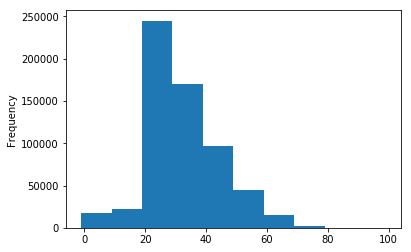

In [46]:
train.age.plot.hist(bins=10)

### 处理age

In [51]:
#将age为0的人变为-1，最后统一变为nan
train.age[train.age == 0] = -1
test.age[test.age == 0] = -1

/Users/fu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/fu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [60]:
test.age[(test.age <= 10) & (test.age > 0)]

211139    6
Name: age, dtype: int64

In [61]:
train.age[(train.age <= 10) & (train.age > 0)]

63014    6
Name: age, dtype: int64

In [62]:
test[test.age == 6]

,service_type,is_mix_service,online_time,1_total_fee,2_total_fee,3_total_fee,4_total_fee,month_traffic,many_over_bill,contract_type,contract_time,is_promise_low_consume,net_service,pay_times,pay_num,last_month_traffic,local_trafffic_month,local_caller_time,service1_caller_time,service2_caller_time,gender,age,complaint_level,former_complaint_num,former_complaint_fee,user_id
211139,3,0,44,113.18,101.14,39.36,126.35,0.0,1,0,0,0,4,1,50.0,0.0,0.356445,0.0,0.0,0.071111,2,6,0,0,0,K0TkW3pcgyqIJljh


In [63]:
train[train.age == 6]

,service_type,is_mix_service,online_time,1_total_fee,2_total_fee,3_total_fee,4_total_fee,month_traffic,many_over_bill,contract_type,contract_time,is_promise_low_consume,net_service,pay_times,pay_num,last_month_traffic,local_trafffic_month,local_caller_time,service1_caller_time,service2_caller_time,gender,age,complaint_level,former_complaint_num,former_complaint_fee,current_service,user_id
63014,3,0,44,113.18,101.14,39.36,126.35,0.0,1,0,0,0,4,1,50.0,0.0,0.356445,0.0,0.0,0.071111,2,6,0,0,0.0,99104722,xWsM670Z5cdTDCf1


In [67]:
train.age[(train.age == -1) | (train.age == 99)] = np.nan

### 处理contract_time

In [76]:
train[train.contract_time == -1].groupby('service_type').size()

service_type
4    1000
dtype: int64

In [77]:
train.contract_time[train.contract_time == -1] = np.nan

/Users/fu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [79]:
test[test.contract_time == -1].groupby('service_type').size()

service_type
4    445
dtype: int64

In [81]:
test.contract_time[test.contract_time == -1] = np.nan

/Users/fu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
print(train.shape,test.shape)

(612652, 27) (262565, 26)


In [83]:
#导出数据
train.to_csv('../moblie_data/train_clean.csv')
test.to_csv('../moblie_data/test_clean.csv')

## 按类型分组

In [42]:
train_1 = train[train.service_type == 1]
train_3 = train[train.service_type == 3]
train_4 = train[train.service_type == 4]

test_1 = test[test.service_type == 1]
test_3 = test[test.service_type == 3]
test_4 = test[test.service_type == 4]